In [1]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank
import librosa



In [2]:
entries = os.listdir('./Train')

In [3]:
def plot_signals(signals):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Time Series', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(signals.keys())[i])
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

def plot_fft(fft):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transforms', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            data = list(fft.values())[i]
            Y, freq = data[0], data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq, Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

def plot_fbank(fbank):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Filter Bank Coefficients', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(fbank.keys())[i])
            axes[x,y].imshow(list(fbank.values())[i],
                    cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

def plot_mfccs(mfccs):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Mel Frequency Cepstrum Coefficients', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i],
                    cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

def calc_fft(y,rate):
    n = len(y)
    freq = np.fft.rfftfreq(n,d=1/rate)
    Y = abs(np.fft.rfft(y)/n)
    return (Y,freq)


# calculate the envelope of a signal

def envelope(y,rate,threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10),min_periods=1, center=True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask


In [4]:
df = pd.read_csv('./TrainZindi.csv')

In [5]:
df.head()
for col in df.columns:
    print(col)

ID
common_name


In [6]:
df.set_index('ID', inplace=True)
for f in df.index:
    rate,signal = wavfile.read('./Train/'+f +'.wav')
    df.at[f,'length'] = signal.shape[0]/rate

In [ ]:
# rate_temp,signal_temp = wavfile.read('/floyd/input/zindi_train_wav/MBMG2C.wav')
# rate_temp

In [7]:
classes = list(np.unique(df.common_name))

In [8]:
class_dist = df.groupby(['common_name'])['length'].mean()

In [9]:
class_dist

common_name
African Paradise Flycatcher         24.578892
African Pipit                       22.083308
African Reed Warbler                46.845750
African Rock Pipit                  48.933733
Bar-throated Apalis                 29.287701
Black Cuckoo                        30.361189
Black-backed Puffback               23.384143
Black-headed Oriole                 45.805479
Bokmakierie                         35.408473
Cape Batis                          33.287700
Cape Bunting                        36.442809
Cape Robin-Chat                     41.136717
Cape White-eye                      32.245009
Chestnut-vented Warbler             46.463127
Chorister Robin-Chat                47.326561
Crested Barbet                      45.468006
Dark-capped Bulbul                  35.850330
Eastern Clapper Lark                38.668858
Fiery-necked Nightjar               43.500189
Fork-tailed Drongo                  43.458639
Green Wood Hoopoe                   36.297872
Green-backed Camaropte

([<matplotlib.patches.Wedge at 0x1a553f44e48>,
 [Text(-0.058972647448067406, 1.0984180565035182, 'African Paradise Flycatcher'),
  Text(-0.17032417483914955, 1.0867334887015137, 'African Pipit'),
  Text(-0.33125185347519437, 1.0489386109631242, 'African Reed Warbler'),
  Text(-0.5416929402165508, 0.9573759755287097, 'African Rock Pipit'),
  Text(-0.6964503212475829, 0.8514440381106317, 'Bar-throated Apalis'),
  Text(-0.8010769317967767, 0.7538406657530903, 'Black Cuckoo'),
  Text(-0.8837855521417161, 0.6549222074609794, 'Black-backed Puffback'),
  Text(-0.9722412103897942, 0.5145357410518615, 'Black-headed Oriole'),
  Text(-1.0477260145421885, 0.3350674535844116, 'Bokmakierie'),
  Text(-1.0860176570923024, 0.17483034199974107, 'Cape Batis'),
  Text(-1.0999695200398836, 0.008188710718314474, 'Cape Bunting'),
  Text(-1.0856233497336176, -0.1772623550367077, 'Cape Robin-Chat'),
  Text(-1.0434681717505931, -0.3481008108917223, 'Cape White-eye'),
  Text(-0.9686174856407715, -0.5213253940783

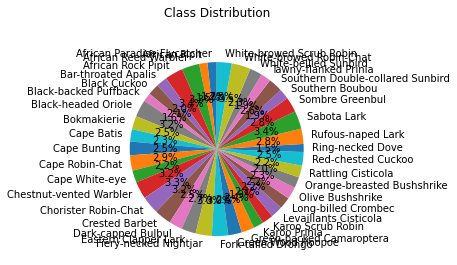

In [10]:
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=class_dist.index, autopct='%1.1f%%', shadow=False, startangle=90)

In [11]:
ax.axis('equal')
plt.show()
df.reset_index(inplace=True)

In [12]:
signals={}
fft={}
fbank={}
mfccs={}


In [13]:
df.head()

ID       common_name     length
0  MBMG2C  Ring-necked Dove  16.393560
1  K8LJSB  Ring-necked Dove  12.042449
2  OGD9L6  Ring-necked Dove  70.217143
3  581PCQ  Ring-necked Dove  21.394286
4  P91M1F  Ring-necked Dove  39.480000

In [14]:
for c in classes:
    
    wav_file = df[df.common_name == c].iloc[0,0]
    new_signal,new_rate = librosa.load('./train/' + wav_file + '.wav',sr=44100)
    mask = envelope(new_signal,new_rate,0.0005) 
    new_signal = new_signal[mask]
    signals[c] = new_signal
    
    fft[c] = calc_fft(new_signal,rate)
    bank = logfbank(new_signal[:rate], rate, nfilt=26, nfft=1103).T
    fbank[c]= bank
    mel = mfcc(new_signal[:rate], rate, numcep=13, nfilt=26, nfft=1103).T
    mfccs[c] = mel

In [15]:
df.head()

ID       common_name     length
0  MBMG2C  Ring-necked Dove  16.393560
1  K8LJSB  Ring-necked Dove  12.042449
2  OGD9L6  Ring-necked Dove  70.217143
3  581PCQ  Ring-necked Dove  21.394286
4  P91M1F  Ring-necked Dove  39.480000

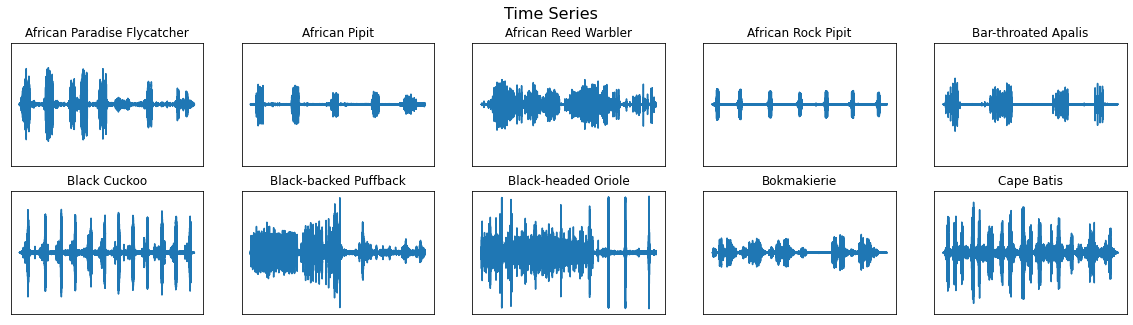

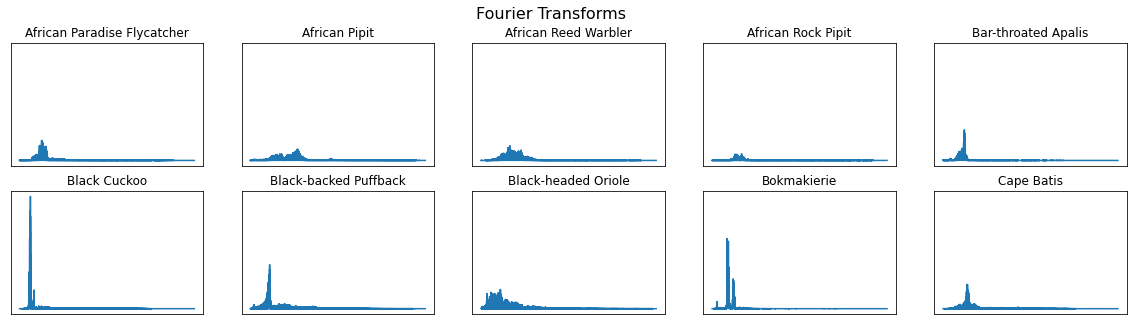

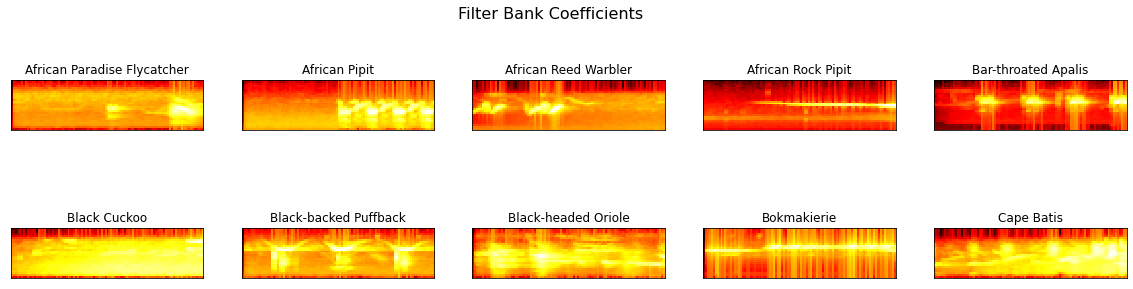

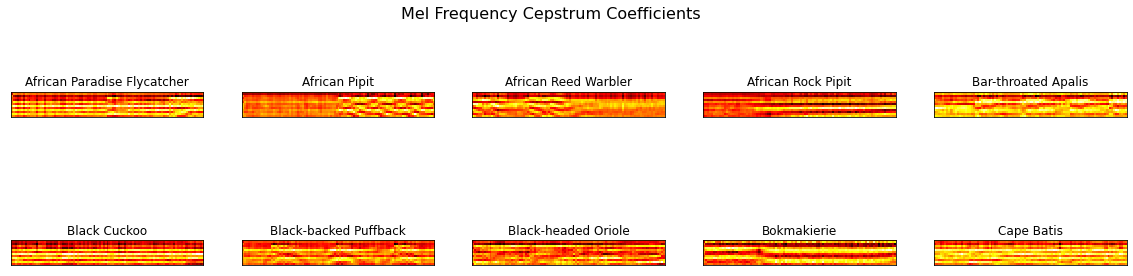

In [16]:
plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_fbank(fbank)
plt.show()

plot_mfccs(mfccs)
plt.show()

In [17]:
if len(os.listdir('CleanedFiles')) == 0:
    for f in tqdm(df.ID):
        final_signal,final_rate = librosa.load('./Train/' +f + '.wav', sr=16000)
        mask = envelope(final_signal,final_rate,0.0005)
        wavfile.write(filename='./CleanedFiles/' +f + '.wav',rate=final_rate,data=final_signal)

100%|██████████████████████████████████████| 1857/1857 [34:51<00:00,  1.13s/it]
